In [132]:
import numpy as np
import torch
import torchvision
import cv2

Проверяем, что у нас доступна cuda:


In [92]:
torch.cuda.is_available()

True

In [95]:
device = torch.device('cpu')

In [96]:
print(device)

cpu


In [109]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [110]:
device

device(type='cuda', index=0)

# Тензоры
Одно из важнейших понятий в pytorch (да и вообще в глубоком обучении) является тензор.

In [127]:
numpy_array = np.random.rand(5, 5)

In [98]:
numpy_array.shape

(640, 480)

In [99]:
numpy_array.dtype

dtype('float64')

In [115]:
torch_array = torch.tensor(numpy_array)

In [101]:
type(torch_array)

torch.Tensor

In [102]:
torch_array.shape

torch.Size([640, 480])

In [103]:
torch_array.dtype

torch.float64

In [111]:
torch_array.device

device(type='cpu')

In [116]:
torch_array = torch_array.to(device)

In [125]:
torch_array = torch_array.cpu()

In [117]:
torch_array.device

device(type='cuda', index=0)

In [128]:
torch_array = torch.from_numpy(numpy_array)

In [131]:
print(torch_array)

<class 'torch.Tensor'>


In [120]:
torch_array[0][0] = 10

In [123]:
torch_array.requires_grad

False

In [159]:
image = cv2.imread('images/cat.jpg')

In [160]:
image.shape # HxWXC -> CxHxW

(549, 564, 3)

In [137]:
torch_array = torch.from_numpy(image)

In [138]:
torch_array[0][0]

tensor([255, 255, 255], dtype=torch.uint8)

# Датасеты и даталоадеры

In [34]:
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [153]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [155]:
len(test_data)

10000

In [169]:
image, label = training_data[1000000]

IndexError: index 1000000 is out of bounds for dimension 0 with size 60000

In [170]:
for batch in somethting:
    ...

SyntaxError: unexpected EOF while parsing (2598448286.py, line 1)

In [166]:
image.shape

torch.Size([1, 28, 28])

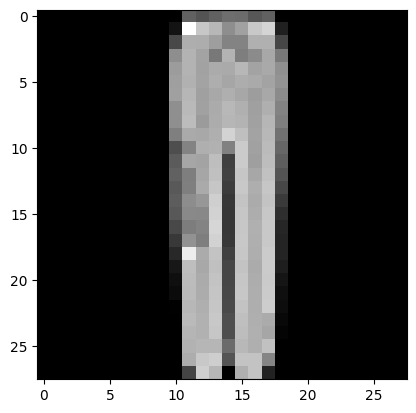

In [167]:
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

In [168]:
label

1

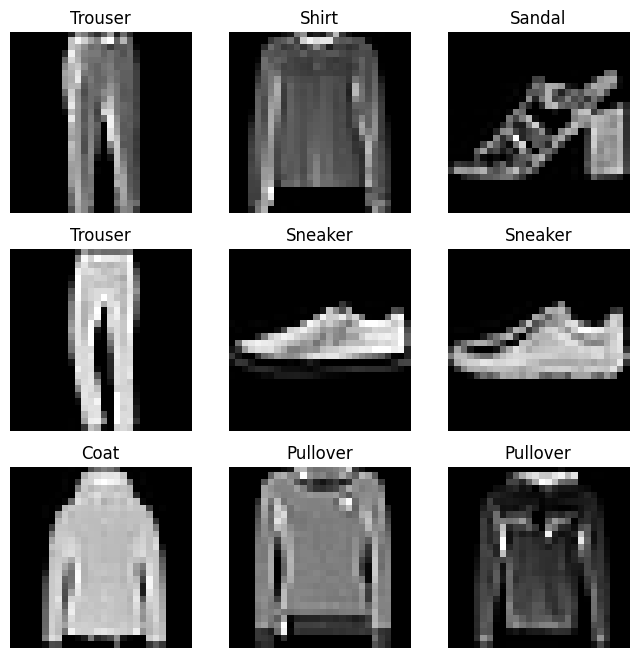

In [140]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [174]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [175]:
for batch, labels in train_dataloader:
    print(batch.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

In [36]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


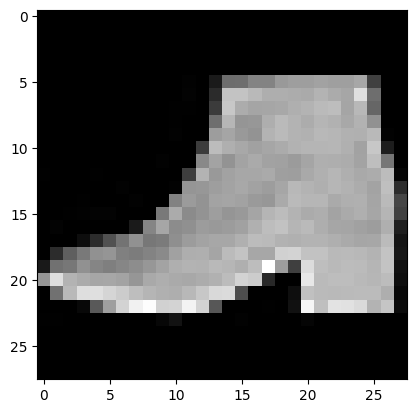

Label: 9


In [176]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Это замечательно, но что нам делать, когда нам нужен кастомный датасет?

In [33]:
class CustomImageDataset(Dataset):
    def __init__(self, path_to_images, label_file):
        self.dataset_len = 1000

    def __len__(self):
        return self.dataset_len

    def __getitem__(self, idx):
        pass

В нашем случае (с теми данными по амброзии, что у нас есть), лучше всего использовать [ImageFolderDataset](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html)

# Определяем модель

In [45]:
from torch import nn

In [228]:
class Seq(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(28*28, 512)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(512, 512)
        self.linear_3 = nn.Linear(512, 10)

    def forward(self, x):
        
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.linear_2(x)
        x = self.relu(x)
        x = self.linear_3(x)
        return x
        


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.seq = Seq()

    def forward(self, x):
        x = self.flatten(x)
        x = self.seq(x)
        return x

In [229]:
model = NeuralNetwork()
model.to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (seq): Seq(
    (linear_1): Linear(in_features=784, out_features=512, bias=True)
    (relu): ReLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
    (linear_3): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [230]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits.shape)

torch.Size([1, 10])


In [231]:

pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[0.0975, 0.0992, 0.1008, 0.1027, 0.1124, 0.1019, 0.0937, 0.0995, 0.0982,
         0.0940]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([4], device='cuda:0')


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [50]:
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


# Соберем простенький пайплайн

In [270]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

In [271]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [272]:
loss_fn = nn.CrossEntropyLoss()

In [273]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0242,  0.0244,  0.0145,  ...,  0.0087,  0.0309, -0.0088],
        [ 0.0279, -0.0133, -0.0160,  ..., -0.0286,  0.0064, -0.0241],
        [ 0.0016,  0.0025,  0.0315,  ..., -0.0029,  0.0261,  0.0061],
        ...,
        [-0.0245,  0.0057, -0.0275,  ..., -0.0223,  0.0035, -0.0283],
        [ 0.0215,  0.0082,  0.0042,  ..., -0.0068,  0.0135, -0.0317],
        [-0.0084, -0.0210, -0.0100,  ...,  0.0117,  0.0224, -0.0352]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 2.1187e-02,  3.3057e-02, -1.5657e-02,  2.0796e-02,  1.3701e-02,
        -1.2536e-02,  1.4935e-02,  5.9192e-03,  3.3918e-02, -2.5676e-02,
         2.6886e-02, -2.0947e-02, -2.0092e-02, -1.0435e-02,  3.1666e-02,
        -2.2093e-02,  1.8339e-02, -2.4061e-02, -2.9581e-02,  7.9367e-03,
        -1.3863e-02,  3.0958e-02, -1.0101e-02, -1.6696e-03,  2.2500e-02,
         6.5719e-03,  2.7898e-02,  2.3055e-02,  3.5675e-02,  1.7177e-02,
         7.5495e-04, -2.7328e-02, -2.637

In [274]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [275]:
for i, j in enumerate([4, 6, 7]):
    print(i, j)

0 4
1 6
2 7


In [276]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    model.train() # говорим модельке, что она в трейн режиме
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [277]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297503  [   64/60000]
loss: 2.280974  [ 6464/60000]
loss: 2.261958  [12864/60000]
loss: 2.261583  [19264/60000]
loss: 2.246647  [25664/60000]
loss: 2.211988  [32064/60000]
loss: 2.223702  [38464/60000]
loss: 2.188204  [44864/60000]
loss: 2.188350  [51264/60000]
loss: 2.155963  [57664/60000]
Test Error: 
 Accuracy: 44.8%, Avg loss: 2.148947 

Epoch 2
-------------------------------
loss: 2.157843  [   64/60000]
loss: 2.149287  [ 6464/60000]
loss: 2.090614  [12864/60000]
loss: 2.111273  [19264/60000]
loss: 2.064571  [25664/60000]
loss: 1.997605  [32064/60000]
loss: 2.031376  [38464/60000]
loss: 1.949589  [44864/60000]
loss: 1.955158  [51264/60000]
loss: 1.887881  [57664/60000]
Test Error: 
 Accuracy: 60.1%, Avg loss: 1.884585 

Epoch 3
-------------------------------
loss: 1.911835  [   64/60000]
loss: 1.886954  [ 6464/60000]
loss: 1.765904  [12864/60000]
loss: 1.812462  [19264/60000]
loss: 1.703241  [25664/60000]
loss: 1.650608  [32064/600

In [280]:
torch.save(model.state_dict(), 'model_weights.pth')
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [281]:
test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 65.1%, Avg loss: 1.080895 



In [282]:
torch.save(model, 'model.pth')

In [285]:
model_2 = torch.load('model.pth').to(device)

In [286]:
model_2

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [287]:
test_loop(test_dataloader, model, loss_fn)




Test Error: 
 Accuracy: 65.1%, Avg loss: 1.080895 



In [288]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory


In [301]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=32)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/oleg/projects/computer_vision_course/.venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


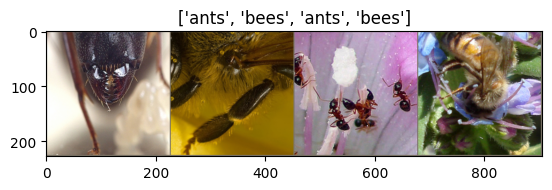

In [295]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [296]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [298]:
model_ft = torchvision.models.resnet18(weights='IMAGENET1K_V1')
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [306]:
model_ft = torchvision.models.resnet18(num_classes=2)
# num_ftrs = model_ft.fc.in_features

# model_ft.fc = nn.Linear(num_ftrs, 2)
print(model_ft)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [302]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.0982 Acc: 0.9672
val Loss: 0.2381 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.0913 Acc: 0.9795
val Loss: 0.2436 Acc: 0.9281

Epoch 2/24
----------
train Loss: 0.0946 Acc: 0.9713
val Loss: 0.2425 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.0905 Acc: 0.9754
val Loss: 0.2383 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.0941 Acc: 0.9713
val Loss: 0.2391 Acc: 0.9281

Epoch 5/24
----------
train Loss: 0.1032 Acc: 0.9508
val Loss: 0.2402 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.0805 Acc: 0.9836
val Loss: 0.2424 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.0997 Acc: 0.9672
val Loss: 0.2383 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.0871 Acc: 0.9713
val Loss: 0.2387 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.1101 Acc: 0.9549
val Loss: 0.2368 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.0907 Acc: 0.9877
val Loss: 0.2420 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.1177 Acc: 0.9426
val Loss: 0.2426 Acc: 0.9216

Ep

In [303]:
model_ft = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_ft.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.SGD(model_ft.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [304]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.8167 Acc: 0.5328


/home/oleg/projects/computer_vision_course/.venv/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


val Loss: 0.7581 Acc: 0.5294

Epoch 1/24
----------
train Loss: 0.8015 Acc: 0.5041
val Loss: 0.7894 Acc: 0.5229

Epoch 2/24
----------
train Loss: 0.8017 Acc: 0.5369
val Loss: 0.8131 Acc: 0.4837

Epoch 3/24
----------
train Loss: 0.8237 Acc: 0.5082
val Loss: 0.8271 Acc: 0.4771

Epoch 4/24
----------
train Loss: 0.7779 Acc: 0.5328
val Loss: 0.8375 Acc: 0.4641

Epoch 5/24
----------
train Loss: 0.8048 Acc: 0.5246
val Loss: 0.8432 Acc: 0.4706

Epoch 6/24
----------
train Loss: 0.8029 Acc: 0.5205
val Loss: 0.8395 Acc: 0.4771

Epoch 7/24
----------
train Loss: 0.8060 Acc: 0.5000
val Loss: 0.8332 Acc: 0.4641

Epoch 8/24
----------
train Loss: 0.8185 Acc: 0.5328
val Loss: 0.8252 Acc: 0.4706

Epoch 9/24
----------
train Loss: 0.8118 Acc: 0.5287
val Loss: 0.8366 Acc: 0.4641

Epoch 10/24
----------
train Loss: 0.7939 Acc: 0.5287
val Loss: 0.8360 Acc: 0.4706

Epoch 11/24
----------
train Loss: 0.7973 Acc: 0.5205
val Loss: 0.8336 Acc: 0.4706

Epoch 12/24
----------
train Loss: 0.8079 Acc: 0.5287
v